# Preparation des données

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import AgglomerativeClustering
from coclust.evaluation.external import accuracy
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import pairwise_distances
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from skfda.representation.basis import BSpline, Fourier, FDataBasis, Monomial
from dtaidistance import dtw
from scipy import fft
from sklearn.preprocessing import PolynomialFeatures
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning:

The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.

 /usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.


In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.cluster import AgglomerativeClustering
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
#from sklearn_extra.cluster import KMedoids
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture as mix
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score


In [ ]:
utils=importr('utils')
utils.install_packages("FCPS")
rpy2.robjects.numpy2ri.activate()
fcps = importr("FCPS")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘plyr’, ‘sp’, ‘pracma’, ‘reshape2’, ‘RcppArmadillo’, ‘mclust’, ‘DataVisualizations’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [ ]:
def test_perf(pred_TSNE_labels):
  nmi = normalized_mutual_info_score(pred_TSNE_labels,labels) *100
  acc = fcps.ClusterAccuracy(pred_TSNE_labels,labels)[0] *100
  ari = adjusted_rand_score(pred_TSNE_labels,labels) *100

  print("Cluster Accuracy score = {}%".format(acc.round(2)))
  print("NMI Score = {}%".format(nmi.round(2)))
  print("ARI score = {}%".format(ari))

In [ ]:
import seaborn as sns
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
def eval_clustering(X,pred_labels,labels=labels):
  labels=globals()['labels']
  plt.figure(figsize=(13, 8))
  plt.subplot(121)
  sns.color_palette("Spectral",as_cmap=True)
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels,palette='Spectral')
  plt.title('true labels')
  plt.subplot(122)
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred_labels,palette='Spectral')
  plt.title('predicted labels')
  nmi = normalized_mutual_info_score(pred_labels,labels) *100
  plt.suptitle('NMI = ' + str(round(nmi,2))+ '%')

In [ ]:
import gdown
import numpy as np

url = "http://allousame.free.fr/mlds/tp/"
files = ["accm", "acce", "vit"]

In [ ]:

for file in files:
  for axis in ["x", "y", "z"]:
    file_ = file + "_" + axis
    url_ = url + file_
    gdown.download(url_, file_, quiet=False)
    globals()[file_] = np.loadtxt(file_, delimiter = " ")

gdown.download(url + "lab.txt", "lab", quiet=False)
globals()["labels"] = np.loadtxt("lab", delimiter = " ")

Downloading...
From: http://allousame.free.fr/mlds/tp/accm_x
To: /content/accm_x
100%|██████████| 427k/427k [00:00<00:00, 1.13MB/s]
Downloading...
From: http://allousame.free.fr/mlds/tp/accm_y
To: /content/accm_y
100%|██████████| 476k/476k [00:00<00:00, 1.24MB/s]
Downloading...
From: http://allousame.free.fr/mlds/tp/accm_z
To: /content/accm_z
100%|██████████| 481k/481k [00:00<00:00, 1.26MB/s]
Downloading...
From: http://allousame.free.fr/mlds/tp/acce_x
To: /content/acce_x
100%|██████████| 512k/512k [00:00<00:00, 1.33MB/s]
Downloading...
From: http://allousame.free.fr/mlds/tp/acce_y
To: /content/acce_y
100%|██████████| 507k/507k [00:00<00:00, 1.33MB/s]
Downloading...
From: http://allousame.free.fr/mlds/tp/acce_z
To: /content/acce_z
100%|██████████| 513k/513k [00:00<00:00, 1.33MB/s]
Downloading...
From: http://allousame.free.fr/mlds/tp/vit_x
To: /content/vit_x
100%|██████████| 493k/493k [00:00<00:00, 1.31MB/s]
Downloading...
From: http://allousame.free.fr/mlds/tp/vit_y
To: /content/vit_y

In [ ]:
data=np.stack((acce_x,acce_y,acce_z,accm_x,accm_y,accm_z,vit_x,vit_y,vit_z),axis=2)

In [ ]:
data.shape

(347, 128, 9)

In [ ]:
!pip install tslearn
!pip install coclust
!pip install scikit-learn==0.22.2
!pip install scikit-fda
!pip install dtaidistance

In [ ]:
nb_classes=len(set(labels))

In [ ]:
data.shape

(347, 128, 9)

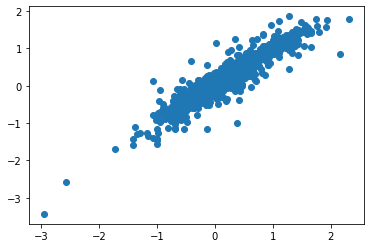

In [ ]:
plt.scatter(data[:,0],data[:,1])

#Classification en méthodes direct

##Time Series k-means avec distance euclidienne

In [ ]:
kmeans = TimeSeriesKMeans(nb_classes, metric="euclidean", max_iter=10,random_state=100)
kmeans.fit(data)
predtmkm_labels = kmeans.labels_

In [ ]:
test_perf(predtmkm_labels)

Cluster Accuracy score = 57.64%
NMI Score = 57.97%
ARI score = 36.303271877943835%


##Time Series k-means avec distance Dynamic Time Wrapping

In [ ]:
kmeans = TimeSeriesKMeans(nb_classes, metric="dtw", max_iter=10,random_state=42)
kmeans.fit(data)
predtmkm_dtw_labels = kmeans.labels_

In [ ]:
test_perf(predtmkm_dtw_labels)

Cluster Accuracy score = 96.54%
NMI Score = 95.19%
ARI score = 93.90279510738463%


#Classification en méthodes basées sur l'extraction de caractéristiques

##Méthode de kmeans avec fourier (dtw)

In [ ]:
fourier = np.abs(fft(data))

In [ ]:
kmfourier = TimeSeriesKMeans(nb_classes, metric="dtw", max_iter=10, random_state=42)
kmfourier.fit(fourier)
predfourier_labels = kmfourier.labels_

In [ ]:
test_perf(predfourier_labels)

Cluster Accuracy score = 63.11%
NMI Score = 69.7%
ARI score = 51.31073199977105%


##Méthode de kmeans avec fourier (euclidean)

In [ ]:
kmfourier = TimeSeriesKMeans(nb_classes, metric="euclidean", max_iter=10, random_state=42)
kmfourier.fit(fourier)
predfourier_euc_labels = kmfourier.labels_

In [ ]:
test_perf(predfourier_euc_labels)

Cluster Accuracy score = 43.23%
NMI Score = 41.83%
ARI score = 20.18309383697929%


##Méthode de réduction de dimension avec FPCA

In [ ]:
fpca = FPCA(n_components=2, components_basis = Fourier(n_basis=347))

In [ ]:
fdata = FDataBasis(Monomial(n_basis=347), data.mean(axis=2).T)

In [ ]:
fpca.fit(fdata)


FPCA(components_basis=Fourier(domain_range=((0, 1),), n_basis=347, period=1),
     n_components=2)

In [ ]:
fpca_data = fpca.components_.coefficients.transpose()

In [ ]:
kmeans = KMeans(nb_classes)
kmeans.fit(fpca_data)
predkm_fpca_labels = kmeans.labels_

In [ ]:
test_perf(predkm_fpca_labels)

Cluster Accuracy score = 30.55%
NMI Score = 16.07%
ARI score = 4.9198510482299165%


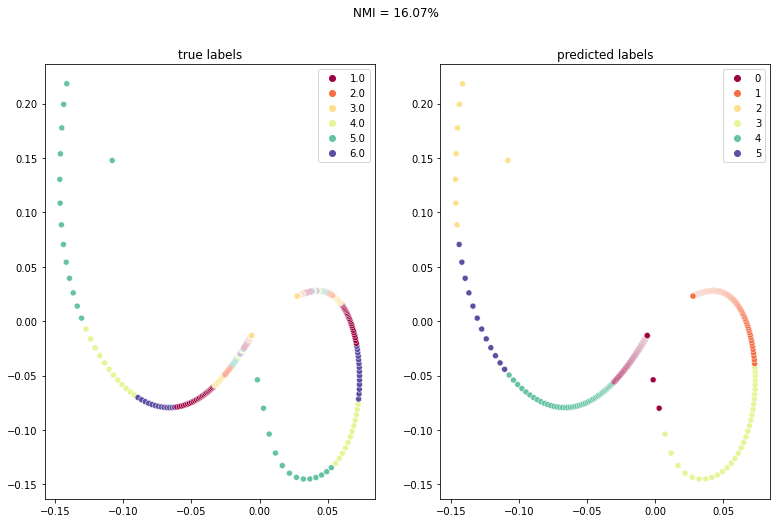

In [ ]:
eval_clustering(fpca_data,predkm_fpca_labels)

#Classification en méthodes probabilistes adaptés aux séries temporelles

##Régression polynomiale

In [ ]:
data.mean(axis=2).shape

(347, 128)

In [ ]:
def get_poly(row):
  x = np.arange(0, 2.56, 0.02)
  poly = np.poly1d(np.polyfit(x, row, 20))
  return poly

In [ ]:
df_avg = pd.DataFrame(data.mean(axis=2))
df_avg_poly = df_avg.apply(get_poly, axis=1)

 /usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:305: RankWarning:Polyfit may be poorly conditioned
 /usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:305: RankWarning:Polyfit may be poorly conditioned
 /usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:305: RankWarning:Polyfit may be poorly conditioned
 /usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:305: RankWarning:Polyfit may be poorly conditioned
 /usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:305: RankWarning:Polyfit may be poorly conditioned
 /usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:305: RankWarning:Polyfit may be poorly conditioned
 /usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:305: RankWarning:Polyfit may be poorly conditioned
 /usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:305: RankWarning:Polyfit may be poorly conditioned
 /usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:305: RankWarning:Polyfit may be poorly cond

In [ ]:
def apply_poly(poly):
  return [poly(i) for i in np.arange(0, 2.56, 0.02)]

In [ ]:
pol_estimations = pd.Series(df_avg_poly).map(apply_poly)

In [ ]:

i_obs = 0

fig = make_subplots(rows=1, cols=1)

fig.append_trace(
  go.Scatter(y=df_avg.iloc[i_obs, :],
              x=np.arange(0, 2.56, 0.02)),
  row=1,
  col=1
)

fig.append_trace(
  go.Scatter(y=pol_estimations[i_obs],
              x=np.arange(0, 2.56, 0.02)),
  row=1,
  col=1
)

fig.update_layout(height= 700, title_text="Centres du groupe des moyennes de la série temporelle ", title_x=0.5)
fig.show()

In [ ]:
poly_coeffs = df_avg_poly.map(lambda poly1d: poly1d.c)
poly_coeffs = np.vstack(poly_coeffs.to_numpy())

In [ ]:
kmeans = KMeans(k)
kmeans.fit(poly_coeffs)
predpoly_labels = kmeans.labels_

In [ ]:
test_perf(predpoly_labels)

Cluster Accuracy score = 29.39%
NMI Score = 25.17%
ARI score = 6.592116285344749%


#Résultats

In [ ]:
print('##### Résultats de la performance des méthodes de classification direct #####')
print('-------------- Times Series KMeans avec distance Euclidienne -------------')
test_perf(predtmkm_labels)
print('-------------- Times Series KMeans avec distance DTW -------------')
test_perf(predtmkm_dtw_labels)
print('\n##### Résultats de la performance des méthodes basées sur l`\'extraction de caractéristiques #####')
print('-------------- Times Series KMeans avec fourier en distance DTW -------------')
test_perf(predfourier_labels)
print('-------------- Times Series KMeans avec fourier en distance Euclidienne -------------')
test_perf(predfourier_euc_labels)
print('-------------- Méthode de réduction de la dimension avec Functional PCA -------------')
test_perf(predkm_fpca_labels)
print('\n##### Résultats de la performance des méthodes probabilistes #####')
print('-------------- Mélange de régréssions polynomiales -------------')

test_perf(predpoly_labels)

##### Résultats de la performance des méthodes de classification direct #####
-------------- Times Series KMeans avec distance Euclidienne -------------
Cluster Accuracy score = 57.64%
NMI Score = 57.97%
ARI score = 36.303271877943835%
-------------- Times Series KMeans avec distance DTW -------------
Cluster Accuracy score = 96.54%
NMI Score = 95.19%
ARI score = 93.90279510738463%

##### Résultats de la performance des méthodes basées sur l`'extraction de caractéristiques #####
-------------- Times Series KMeans avec fourier en distance DTW -------------
Cluster Accuracy score = 63.11%
NMI Score = 69.7%
ARI score = 51.31073199977105%
-------------- Times Series KMeans avec fourier en distance Euclidienne -------------
Cluster Accuracy score = 43.23%
NMI Score = 41.83%
ARI score = 20.18309383697929%
-------------- Méthode de réduction de la dimension avec Functional PCA -------------
Cluster Accuracy score = 30.55%
NMI Score = 16.07%
ARI score = 4.9198510482299165%

##### Résultats de 